In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from getdist import plots, MCSamples
import getdist
import cosmolopy.distance as distance
import time

In [2]:
#Criterio de convergencia de Gelman Rubin
def si2(cadena):
    '''
    Se introduce el arreglo de valores de la cadena de un solo parámetro sin burn
    '''
    media=np.mean(cadena)
    return 1/(len(cadena)-1)*np.sum((cadena-media)**2),media

def gelmanrubin(res):
    si2p=np.zeros([len(res[0][0][0])-1,len(res)])
    mediasp=np.zeros([len(res[0][0][0])-1,len(res)])
    s2=np.zeros(len(res[0][0][0])-1)
    bn=np.zeros(len(res[0][0][0])-1)
    sigmagorro=np.zeros(len(res[0][0][0])-1)
    R=np.zeros(len(res[0][0][0])-1)
    for i in range(len(res[0][0][0])-1):
        for j in range(len(res)):
            si2p[i][j],mediasp[i][j]=si2(np.array(res[j][0])[(len(res[j][0])-burn):,i])
        s2[i]=np.sum(si2p[i])/len(res)
        bn[i]=1/(len(res)-1)*np.sum((mediasp[i]-np.mean(mediasp[i]))**2)
        sigmagorro[i]=(len(np.array(res[i][0])[(len(res[j][0])-burn):,0])-1)/len(np.array(res[i][0])[(len(res[j][0])-burn):,0])*s2[i]+bn[i]
        R[i]=np.sqrt(sigmagorro[i]/s2[i])
        print("R=%.5f para "% R[i] +paramnames[i])
    return R

def confianza(unioncadenas):
    conf=np.zeros([len(unioncadenas[0])-1,2])
    for i in range(len(unioncadenas[0])-1):
        conf[i]=np.percentile(unioncadenas.T[i],[16,84])-promedios[i]
    return conf

In [3]:
#nombres de los parámetros
paramnames=['α','β','M_b','Ω_M']
#se fijan extremos del espacio en el que se busca el valor de los parámetros
ext=[[0.,1.],[2.,6],[-20.,-18.],[0.,1.]]
#cantidad de cadenas a correr
ncadenas=8
#Genera puntos aleatorios como aproximaciones iniciales en el espacio delimitado anteriormente
aprox=[[np.random.uniform(ext[j][0],ext[j][1]) for j in range(len(ext))] for i in range(ncadenas)]

In [4]:
res=np.load("8x10k3.npy",allow_pickle = True)

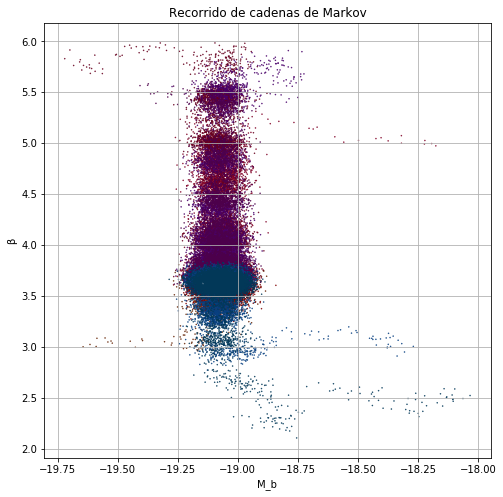

In [5]:
cmaps=['YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

fig,ax=plt.subplots(figsize=(8, 8))

for i in range(len(aprox)):
    ax.scatter(np.array(res[i][0])[:,2],np.array(res[i][0])[:,1],c=np.array(res[i][0])[:,4],s=1,cmap=cmaps[i],marker=".")

ax.set_xlabel(paramnames[2])
ax.set_ylabel(paramnames[1])
ax.set_title('Recorrido de cadenas de Markov') 
plt.grid()

In [6]:
#Visualización de cada parámetro sin el burn
burnaux=5000    #primeros n datos a eliminar
burn=len(res[0][0])-burnaux
promediosc=np.zeros([ncadenas,len(ext)])

for j in range(len(res)):
    fig, ax = plt.subplots(len(ext))
    for i in range(len(ext)):
        ax[i].plot(range(len(np.array(res[j][0])[:,i])-burn-1,len(np.array(res[j][0])[:,i])),np.array(res[j][0])[len(np.array(res[j][0])[:,i])-1-burn:,i])
        ax[i].set_ylabel('Parámetro '+str(i+1))
        promediosc[j][i]=np.mean(np.array(res[j][0])[len(np.array(res[j][0])[:,i])-1-burn:,i])
    ax[i].set_xlabel('Iteraciones')
    ax[i-len(ext)+1].set_title('Cadena '+str(j+1))
    plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [7]:
#Se unen cadenas sin burn en un solo arreglo
unioncadenas=[]
for i in range(len(res)):
    for j in range(len(res[i][0])-burnaux):
        unioncadenas.append(res[i][0][j+burnaux])
unioncadenas=np.array(unioncadenas)

Text(0.5, 1.0, 'Cadenas unidas')

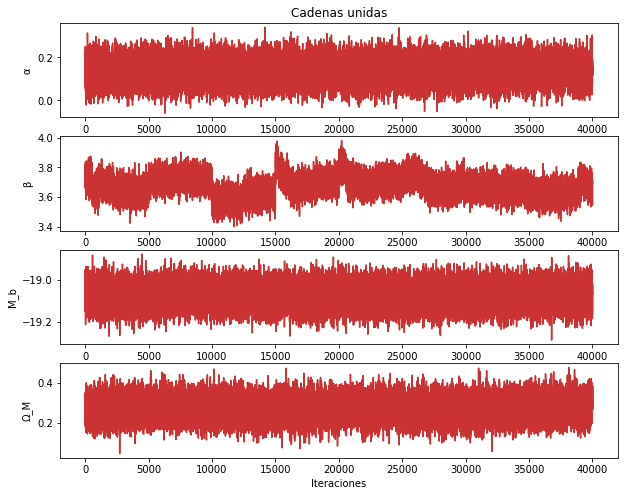

In [8]:
#Visualización de cada parámetro de la cadena unida
fig, ax = plt.subplots(len(ext),figsize=(10, 8))
for i in range(len(ext)):
    ax[i].plot(range(len(unioncadenas)),unioncadenas[:,i],c='#cb3234')
    ax[i].set_ylabel(paramnames[i])
ax[i].set_xlabel('Iteraciones')
ax[0].set_title('Cadenas unidas')

In [9]:
#Cálculo de promedios de cada parámetro
promedios=[np.mean(unioncadenas[:,i]) for i in range(len(ext))]
promedios

[0.13921247736527065,
 3.673980748434794,
 -19.074491479780036,
 0.27156539151476905]

Removed no burn in


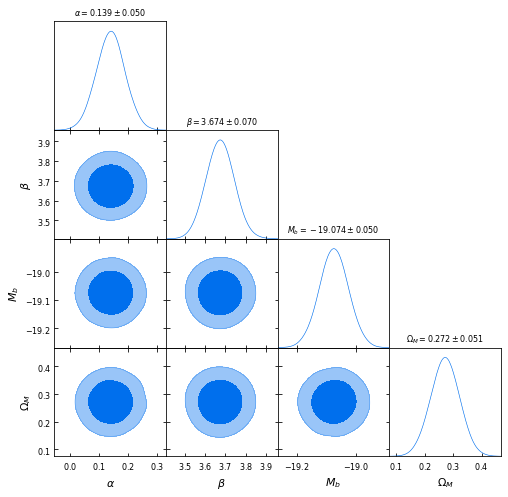

In [10]:
#Gráfica triangular
samples=MCSamples(samples=np.array(unioncadenas[:,(0,1,2,3)]),names=['alpha','beta','Mb','om_M'],labels=['α','β','M_b','\Omega _M'])
g = plots.get_subplot_plotter()
g.triangle_plot(samples, filled=True,title_limit=1)

In [11]:
R=gelmanrubin(res)

R=1.00006 para α
R=1.23353 para β
R=1.00159 para M_b
R=1.00479 para Ω_M


In [12]:
conf=confianza(unioncadenas)

for i in range(len(conf)):
    print(paramnames[i]+'\t%.5f'%promedios[i]+' \t[ %.5f , '%conf[i][0]+'%.5f ]'%conf[i][1])

α	0.13921 	[ -0.04978 , 0.04919 ]
β	3.67398 	[ -0.06954 , 0.06847 ]
M_b	-19.07449 	[ -0.04960 , 0.04989 ]
Ω_M	0.27157 	[ -0.05082 , 0.05059 ]
